In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns


pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("https://www.crowdflower.com/wp-content/uploads/2016/03/us-economic-newspaper.csv")

In [16]:
pd.set_option('display.max_columns', None)
df

_unit_id _golden _unit_state  _trusted_judgments _last_judgment_at  \
0     729487630   False   finalized                   3      6/8/15 14:26   
1     729487631   False   finalized                   3     6/11/15 10:58   
2     729487632   False   finalized                   3       6/6/15 0:15   
3     729487633   False   finalized                   3     6/14/15 20:27   
4     729487634   False   finalized                   3      6/6/15 13:22   
5     729487635   False   finalized                   3       6/9/15 6:32   
6     729487636   False   finalized                   3      6/10/15 0:33   
7     729487637   False   finalized                   3     6/11/15 15:28   
8     729487638   False   finalized                   3       6/5/15 7:25   
9     729487639   False   finalized                   3      6/9/15 14:10   
10    729487640   False   finalized                   3      6/4/15 21:34   
11    729487641   False   finalized                   3       6/8/15 6:40   
12    729487642   False   finalized                   3      6/4/15 16:28   
13    729487643   False   finalized                   3     6/15/15 16:27   
14    729487644   False   finalized                   3       6/6/15 4:50   
15    729487645   False   finalized                   3      6/7/15 18:38   
16    729487646   False   finalized                   3      6/15/15 8:14   
17    729487647   False   finalized                   3      6/15/15 8:51   
18    729487648   False   finalized                   3       6/7/15 0:48   
19    729487649   False   finalized                   3     6/14/15 14:14   
20    729487650   False   finalized                   3       6/7/15 9:48   
21    729487651   False   finalized                   3     6/15/15 14:38   
22    729487652   False   finalized                   3       6/8/15 6:23   
23    729487653    True      golden                  73      6/8/15 14:15   
24    729487654   False   finalized                   3       6/7/15 3:30   
25    729487655   False   finalized                   3      6/9/15 15:58   
26    729487656   False   finalized                   3       6/8/15 6:10   
27    729487657   False   finalized                   3      6/11/15 2:34   
28    729487658    True      golden                  64               NaN   
29    729487659   False   finalized                   3      6/11/15 1:48   
30    729487660   False   finalized                   3       6/7/15 1:11   
31    729487661   False   finalized                   3      6/10/15 5:59   
32    729487662   False   finalized                   3      6/7/15 21:33   
33    729487663   False   finalized                   3      6/9/15 19:48   
34    729487664   False   finalized                   3       6/8/15 9:30   
35    729487665   False   finalized                   3     6/15/15 22:46   
36    729487666   False   finalized                   3       6/9/15 6:31   
37    729487667   False   finalized                   3     6/14/15 18:32   
38    729487668   False   finalized                   3      6/11/15 2:43   
39    729487669   False   finalized                   3       6/7/15 5:35   
40    729487670   False   finalized                   3     6/10/15 18:54   
41    729487671   False   finalized                   3       6/6/15 2:44   
42    729487672   False   finalized                   3       6/6/15 7:36   
43    729487673   False   finalized                   3      6/8/15 13:56   
44    729487674   False   finalized                   3      6/5/15 10:39   
45    729487675   False   finalized                   3      6/7/15 23:10   
46    729487676   False   finalized                   3      6/4/15 16:30   
47    729487677   False   finalized                   3       6/7/15 5:46   
48    729487678   False   finalized                   3      6/6/15 15:28   
49    729487679   False   finalized                   3      6/6/15 18:06   
50    729487680   False   finalized                   3       6/7/15 2:46   
51 

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
date = df['date']
date.head()

0   1993-02-23
1   1993-02-23
2   1993-02-23
3   1993-02-23
4   1993-02-23
Name: date, dtype: datetime64[ns]

In [6]:
df['year'] = date.apply(lambda x: x.year)

In [7]:
def compute_decade(year):
    if year < 2000:
        century = 1900
    else:
        century = 2000
    return np.int(10 * np.floor(float(year - century) / 10)) + century 

In [8]:
df["decade"] = df["year"].apply(compute_decade)

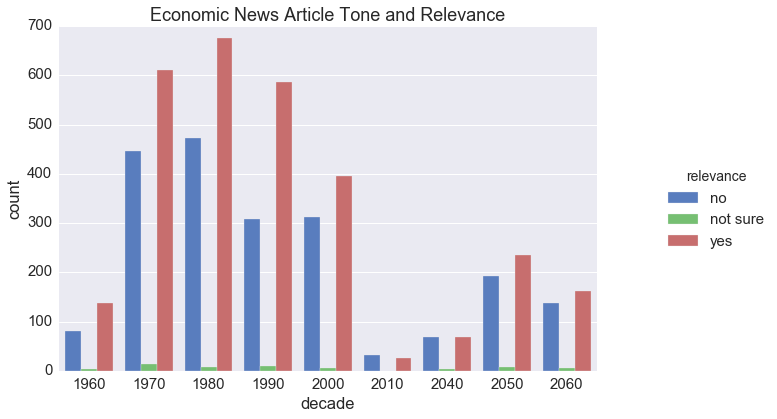

In [9]:
decade_relevance_df = df.groupby(['decade','relevance']).size()

decade_relevance_df = decade_relevance_df.reset_index()

decade_relevance_df = decade_relevance_df.rename(columns={0: 'count'})

sns.set(font_scale=1.5)
g = sns.factorplot(x="decade",
                   y="count",
                   hue="relevance",
                   data=decade_relevance_df,
                   size=6,
                   kind="bar",
                   palette="muted")
g.fig.set_figwidth(12)
g.ax.set_title("Economic News Article Tone and Relevance")

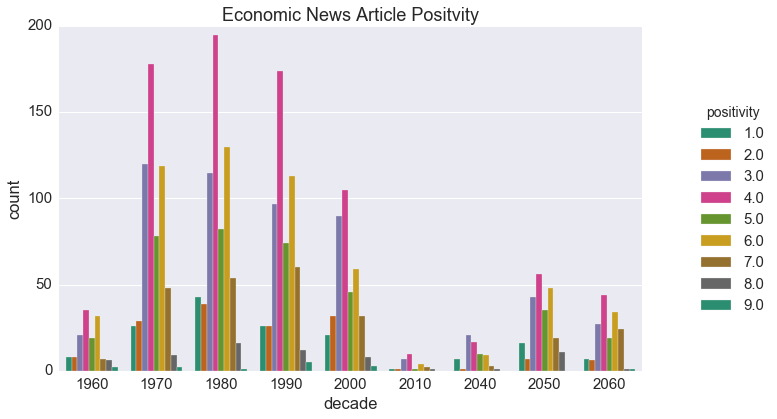

In [17]:
relevant_articles = df[df["relevance"] == "yes"].copy()
 
decade_positive_df = relevant_articles.groupby(['decade','positivity']).size()

decade_positive_df = decade_positive_df.reset_index()

decade_positive_df = decade_positive_df.rename(columns={0: 'count'})

sns.set(font_scale=1.5)
g = sns.factorplot(x="decade",
                   y="count",
                   hue="positivity",
                   data=decade_positive_df,
                   size=6,
                   kind="bar",
                   palette="Dark2")
g.fig.set_figwidth(12)
g.ax.set_title("Economic News Article Positvity")
plt.savefig("./decade_positivesentiment.png")

In [27]:
df[(df.decade == 2060)]

_unit_id _golden _unit_state  _trusted_judgments _last_judgment_at  \
15    729487645   False   finalized                   3      6/7/15 18:38   
16    729487646   False   finalized                   3      6/15/15 8:14   
17    729487647   False   finalized                   3      6/15/15 8:51   
18    729487648   False   finalized                   3       6/7/15 0:48   
19    729487649   False   finalized                   3     6/14/15 14:14   
55    729487685   False   finalized                   3      6/12/15 5:12   
56    729487686   False   finalized                   3     6/11/15 21:25   
57    729487687   False   finalized                   3       6/9/15 1:41   
58    729487688   False   finalized                   3       6/7/15 4:38   
59    729487689   False   finalized                   3      6/4/15 22:14   
184   729487815   False   finalized                   3      6/4/15 22:17   
185   729487816   False   finalized                   3     6/12/15 16:54   
186   729487817   False   finalized                   3       6/9/15 3:10   
187   729487818   False   finalized                   3      6/5/15 10:48   
188   729487819   False   finalized                   3       6/7/15 2:43   
284   729487915   False   finalized                   3      6/7/15 18:46   
285   729487916   False   finalized                   3      6/9/15 18:18   
286   729487917   False   finalized                   3      6/4/15 22:19   
287   729487918   False   finalized                   3     6/12/15 13:06   
288   729487919   False   finalized                   3      6/11/15 0:35   
374   729488005   False   finalized                   3      6/6/15 18:00   
375   729488006   False   finalized                   3     6/10/15 19:46   
376   729488007   False   finalized                   3     6/10/15 22:36   
377   729488008   False   finalized                   3      6/10/15 3:11   
378   729488009   False   finalized                   3      6/14/15 3:13   
384   729488015   False   finalized                   3      6/16/15 0:02   
385   729488016   False   finalized                   3       6/8/15 2:38   
386   729488017   False   finalized                   3      6/14/15 1:47   
387   729488018   False   finalized                   3       6/6/15 2:41   
388   729488019   False   finalized                   3       6/7/15 9:58   
424   729488055   False   finalized                   3       6/5/15 2:29   
425   729488056   False   finalized                   3     6/10/15 20:57   
426   729488057   False   finalized                   3      6/9/15 19:57   
427   729488058   False   finalized                   3      6/7/15 18:52   
428   729488059   False   finalized                   3       6/9/15 2:40   
644   729488275   False   finalized                   3      6/8/15 13:51   
645   729488276   False   finalized                   3     6/15/15 22:16   
646   729488277   False   finalized                   3       6/8/15 6:11   
647   729488278   False   finalized                   3       6/7/15 3:39   
648   729488279   False   finalized                   3      6/12/15 1:40   
649   729488280   False   finalized                   3      6/9/15 12:32   
650   729488281   False   finalized                   3      6/15/15 3:40   
651   729488282   False   finalized                   3      6/12/15 6:15   
652   729488283   False   finalized                   3     6/10/15 19:50   
653   729488284   False   finalized                   3      6/6/15 23:32   
744   729488375   False   finalized                   3     6/10/15 21:34   
745   729488376   False   finalized                   3      6/6/15 18:03   
746   729488377   False   finalized                   3      6/7/15 10:06   
747   729488378   False   finalized                   3      6/8/15 23:32   
748   729488379   False   finalized                   3      6/9/15 18:06   
754   729488385   False   finalized                   3       6/6/15 3:35   
755